<a href="https://colab.research.google.com/github/suryawanshi-harshal/congressional-analysis/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/gendo102/congressional-analysis/blob/main/Assignment_1.ipynb



**Introduction**

Based on the previous analysis done on congressional districts and % of households earning over \$200k and % of households less than $10k, it appears that there are many Democratic congressional districts with high earning households. For our analysis, we wanted to look into how race could be a confounding variable to this observation. 





**Hypothesis**

For this analysis we will look at respective races in Republican, Democratic and Libertarian districts. To do so, we will leverage two data sources that we will need to combine together. 

First, we will use the American Community Survey 2021 dataset available from census.gov. The data is available via API from here: https://www.census.gov/data/developers/data-sets/acs-1year.html. This data is commonly referenced when people are looking for demographic breakdowns of the American population. This data refers back to the 116th congressional district. 

Second, to get the party affiliation of each congressional district, we will use https://www.house.gov/representatives. Someone has already scraped the house.gov site to turn it into a csv here: http://goodcsv.com/politics/us-house-of-representatives-2020/ for the 116th congressional district.


**Based on poltiical party research, we hypothesize the majority of Black, American Indian and Asians are affiliated with a Democratic congressional district while majority of Whites are affiliated with a Republican congressional district.**



In [ ]:
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

First we will read the ACS 2021 dataset and get it into a usable state for our data analysis.

In [ ]:
# We are reading in the data we want from ACS 2021. The API returns json data. 
#adding in race total--B02001_001E
#white alone--B02001_002E
#black alone--B02001_003E
#American Indian alone--B02001_004E
#Asian alone--B02001_005E
#Asian alone--B02001_005E
#Total Household Income--B19001_001E
#Household income below $10,000-B19001_002E
#Household income above $200,000-B19001_017E
#Total # of earners in families--B19122_001E

url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B19001_001E,B19001_002E,B19001_017E,B19122_001E&for=congressional%20district:*&in=state:*"

# store the response of URL
response = urlopen(url)

# storing the JSON response from url in data
data_json = json.loads(response.read())
data_json.pop(0) # the first row of data is header information which we don't need, so pop removes that from the dataset.


# Hand populate the columns based on the variable descriptions census.gov documents here: https://api.census.gov/data/2021/acs/acs1/variables.html. Note they correspond back to the variable names I included in the URL above.
cols = ['District Name','Total Race','White', 'Black', 'American Indian', 'Asian','Total Households','Less than $10k', '$200k+', 'Total Number Earners','State Code', 'District Number']


acs_df = pd.DataFrame(data_json, columns = cols)
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['District Number'] = pd.to_numeric(acs_df['District Number'])
acs_df.head()



,District Name,Total Race,White,Black,American Indian,Asian,Total Households,Less than $10k,$200k+,Total Number Earners,State Code,District Number,District,State
0,"Congressional District 10 (116th Congress), Mi...",725418,638395,30095,2437,11395,289474,14153,19390,197793,26,10,Congressional District 10 (116th Congress),Michigan
1,"Congressional District 4 (116th Congress), Mis...",780305,527281,165773,4140,10700,299804,23793,10899,198576,28,4,Congressional District 4 (116th Congress),Mississippi
2,"Congressional District 14 (116th Congress), Mi...",672799,227884,358789,1817,29190,278057,27728,19574,159041,26,14,Congressional District 14 (116th Congress),Michigan
3,"Congressional District 1 (116th Congress), Mic...",707596,632466,9435,16181,3871,306685,19036,12208,191950,26,1,Congressional District 1 (116th Congress),Michigan
4,"Congressional District 3 (116th Congress), Mis...",745609,436783,256945,7992,7303,285554,26481,12412,190700,28,3,Congressional District 3 (116th Congress),Mississippi


In [ ]:
# Convert the number columns into number data types so we can math on them
acs_df["Total Race"] = pd.to_numeric(acs_df["Total Race"])
acs_df["White"] = pd.to_numeric(acs_df["White"])
acs_df["Black"] = pd.to_numeric(acs_df["Black"])
acs_df["American Indian"] = pd.to_numeric(acs_df["American Indian"])
acs_df["Asian"] = pd.to_numeric(acs_df["Asian"])
acs_df["State Code"] = pd.to_numeric(acs_df["State Code"])
acs_df["District Number"] = pd.to_numeric(acs_df["District Number"])
acs_df["Total Households"] = pd.to_numeric(acs_df["Total Households"])
acs_df["Less than $10k"] = pd.to_numeric(acs_df["Less than $10k"])
acs_df["$200k+"] = pd.to_numeric(acs_df["$200k+"])
acs_df["Total Number Earners"] = pd.to_numeric(acs_df["Total Number Earners"])

# Compute a new column based on the existing columns for later visualization
acs_df['% of Earners by District'] = (100*acs_df['Total Number Earners'])/acs_df['Total Households']
acs_df['% of White Individuals by District'] = (100*acs_df['White'])/acs_df['Total Race']
acs_df['% of Black Individuals by District'] = (100*acs_df['Black'])/acs_df['Total Race']
acs_df['% of American Indian Individuals by District'] = (100*acs_df['American Indian'])/acs_df['Total Race']
acs_df['% of Asian Individuals by District'] = (100*acs_df['Asian'])/acs_df['Total Race']

acs_df['State'] = acs_df['State'].str.strip()
acs_df.head()

,District Name,Total Race,White,Black,American Indian,Asian,Total Households,Less than $10k,$200k+,Total Number Earners,State Code,District Number,District,State,% of Earners by District,% of White Individuals by District,% of Black Individuals by District,% of American Indian Individuals by District,% of Asian Individuals by District
0,"Congressional District 10 (116th Congress), Mi...",725418,638395,30095,2437,11395,289474,14153,19390,197793,26,10,Congressional District 10 (116th Congress),Michigan,68.328416,88.003744,4.148643,0.335944,1.570818
1,"Congressional District 4 (116th Congress), Mis...",780305,527281,165773,4140,10700,299804,23793,10899,198576,28,4,Congressional District 4 (116th Congress),Mississippi,66.235274,67.573705,21.244642,0.530562,1.371259
2,"Congressional District 14 (116th Congress), Mi...",672799,227884,358789,1817,29190,278057,27728,19574,159041,26,14,Congressional District 14 (116th Congress),Michigan,57.197265,33.871037,53.327814,0.270066,4.338591
3,"Congressional District 1 (116th Congress), Mic...",707596,632466,9435,16181,3871,306685,19036,12208,191950,26,1,Congressional District 1 (116th Congress),Michigan,62.588650,89.382359,1.333388,2.286757,0.547064
4,"Congressional District 3 (116th Congress), Mis...",745609,436783,256945,7992,7303,285554,26481,12412,190700,28,3,Congressional District 3 (116th Congress),Mississippi,66.782465,58.580704,34.461092,1.071875,0.979468


In [ ]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['District Number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['District Number'] = party_df['District Number'].fillna(0)
party_df['District Number'] = pd.to_numeric(party_df['District Number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "District Number"]]

party_df.head(5)

,State,Party,District Number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


Now let's get our party affiliation data in a state to merge with the ACS data.

In [ ]:
# Merge is like a sql natural join. We are joining on the State and District numbers being the same between the two sets.
merged_df = pd.merge(acs_df, party_df, on=["State", "District Number"])
merged_df

,District Name,Total Race,White,Black,American Indian,Asian,Total Households,Less than $10k,$200k+,Total Number Earners,State Code,District Number,District,State,% of Earners by District,% of White Individuals by District,% of Black Individuals by District,% of American Indian Individuals by District,% of Asian Individuals by District,Party
0,"Congressional District 10 (116th Congress), Mi...",725418,638395,30095,2437,11395,289474,14153,19390,197793,26,10,Congressional District 10 (116th Congress),Michigan,68.328416,88.003744,4.148643,0.335944,1.570818,R
1,"Congressional District 4 (116th Congress), Mis...",780305,527281,165773,4140,10700,299804,23793,10899,198576,28,4,Congressional District 4 (116th Congress),Mississippi,66.235274,67.573705,21.244642,0.530562,1.371259,R
2,"Congressional District 14 (116th Congress), Mi...",672799,227884,358789,1817,29190,278057,27728,19574,159041,26,14,Congressional District 14 (116th Congress),Michigan,57.197265,33.871037,53.327814,0.270066,4.338591,D
3,"Congressional District 1 (116th Congress), Mic...",707596,632466,9435,16181,3871,306685,19036,12208,191950,26,1,Congressional District 1 (116th Congress),Michigan,62.588650,89.382359,1.333388,2.286757,0.547064,R
4,"Congressional District 3 (116th Congress), Mis...",745609,436783,256945,7992,7303,285554,26481,12412,190700,28,3,Congressional District 3 (116th Congress),Mississippi,66.782465,58.580704,34.461092,1.071875,0.979468,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,"Congressional District 6 (116th Congress), Mis...",788813,674961,38689,3098,11602,297714,15159,18947,199525,29,6,Congressional District 6 (116th Congress),Missouri,67.019018,85.566668,4.904711,0.392742,1.470818,R
431,"Congressional District 7 (116th Congress), Mis...",799499,687776,8683,4574,10931,320905,19373,14584,204313,29,7,Congressional District 7 (116th Congress),Missouri,63.667752,86.025874,1.086055,0.572108,1.367231,R
432,"Congressional District 5 (116th Congress), Mic...",664225,492088,116530,1811,5028,282817,24427,8871,166698,26,5,Congressional District 5 (116th Congress),Michigan,58.942001,74.084535,17.543754,0.272649,0.756972,D
433,"Congressional District 6 (116th Congress), Mic...",720214,574211,56700,3813,11536,287908,17508,15476,182608,26,6,Congressional District 6 (116th Congress),Michigan,63.425817,79.727831,7.872660,0.529426,1.601746,R


Let's pull some statistics on the two datasets quickly before we join them so we can sanity check that the join worked okay.

In [ ]:
merged_df.describe()

,Total Race,White,Black,American Indian,Asian,Total Households,Less than $10k,$200k+,Total Number Earners,State Code,District Number,% of Earners by District,% of White Individuals by District,% of Black Individuals by District,% of American Indian Individuals by District,% of Asian Individuals by District
count,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,7.614338e+05,466041.262069,91735.636782,7258.420690,43976.082759,292471.643678,17605.977011,28522.944828,189278.742529,27.659770,10.158621,65.036014,61.251799,12.089114,0.948944,5.752186
std,6.802326e+04,158916.563633,98321.463503,14437.363291,54489.597078,33670.787672,6047.931263,18902.411362,22227.568932,16.128777,10.656779,6.291111,20.656890,13.256682,1.902496,7.213876
min,5.436880e+05,49551.000000,4750.000000,233.000000,1564.000000,183319.000000,6021.000000,5296.000000,132317.000000,1.000000,0.000000,37.300675,6.761208,0.516449,0.031677,0.226671
25%,7.193340e+05,358259.000000,25096.500000,1994.000000,12534.000000,273747.000000,13416.000000,14916.000000,175529.500000,12.000000,3.000000,61.971439,46.384093,3.433011,0.267888,1.660460
50%,7.570710e+05,500051.000000,52634.000000,3688.000000,24369.000000,292311.000000,16617.000000,22543.000000,189218.000000,27.000000,6.000000,65.118982,64.916192,6.884861,0.472595,3.097422
75%,7.907175e+05,595023.000000,117135.000000,7834.000000,50845.500000,311849.500000,21013.500000,37009.500000,201166.000000,42.000000,13.000000,68.750488,77.930893,15.225237,1.026977,6.657846
max,1.104271e+06,939189.000000,496747.000000,166732.000000,444629.000000,448949.000000,44929.000000,111988.000000,275623.000000,56.000000,53.000000,82.599371,94.577434,67.596513,21.531754,57.646252


There are 435 total rows, which matches up with the number of congress members in the 116th congress. Looks pretty good. Let's do a final check by looking at party counts.

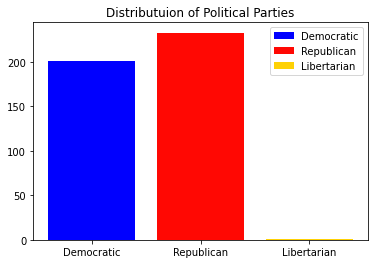

In [ ]:
warnings.filterwarnings('ignore')

plt.bar(x = 'Democratic', height = merged_df['Party'].value_counts()[1], color = '#0000ff', label = 'Democratic')
plt.bar(x = 'Republican', height = merged_df['Party'].value_counts()[0], color = '#ff0803', label = 'Republican')
plt.bar(x = 'Libertarian', height = merged_df['Party'].value_counts()[2], color = '#fed105', label = 'Libertarian')
plt.title('Distributuion of Political Parties')
plt.legend()
plt.show()
#print(f'''There are {merged_df['Party'].value_counts()[1]} Democrats and {merged_df['Party'].value_counts()[0]} Republicans and {merged_df['Party'].value_counts()[2]} Libertarian.''')


In [ ]:
#subset of merged_df for columns we want to plot
new_df_counts = merged_df[['White', 'Black', 'American Indian', 'Asian', 'Party', 'State']]
#new_df_counts.head()

Let's do our visualizations now. We will do a bars plot of congressional districts and look at the distribution of races. We will color the plot based upon the party affiliation of the districts congress member as of the 116th congress.

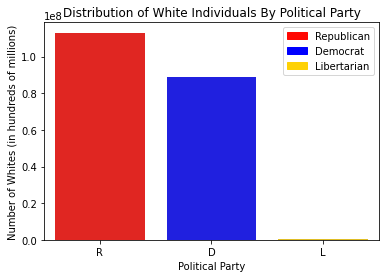

In [ ]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "White", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Distribution of White Individuals By Political Party")
plt.ylabel("Number of Whites (in hundreds of millions)")
plt.xlabel("Political Party")


# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()


**As we can see from this bar plot, the majority of individuals that chose White as their race were in Republican congressional districts. This is consistent with our initial hypothesis.**

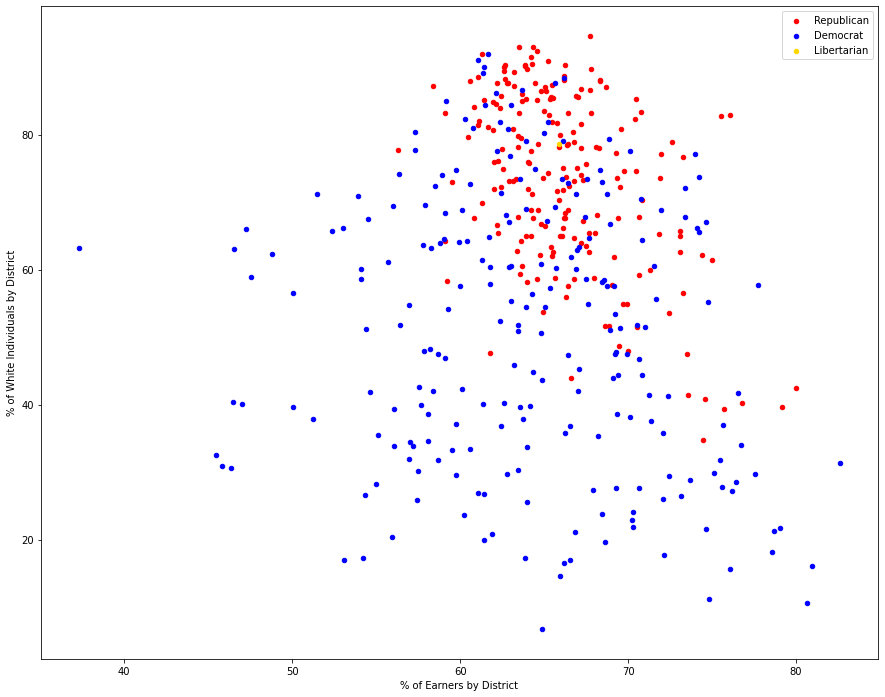

In [ ]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]
L = merged_df[merged_df['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x= '% of Earners by District', y='% of White Individuals by District', c='red',label='Republican', ax=ax)
D.plot.scatter(x= '% of Earners by District', y='% of White Individuals by District',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x= '% of Earners by District', y='% of White Individuals by District',c='gold',label='Libertarian', ax=ax)

plt.legend()
plt.show()

Additionally, this scatter plot visualizes the % White individuals by district on one axis and % of earners in a district on the other axis. We will color the plot based upon the party affiliation of the districts congress member as of the 116th congress. From this plot we can see those congressional districts with lower percentages of white individuals tend to be all Democratic regardless of the percentage of earners in the district. However, as the percentage of white individuals in the district increases and the % of earners increases there is more of a mix between Republicans and and Democrats.

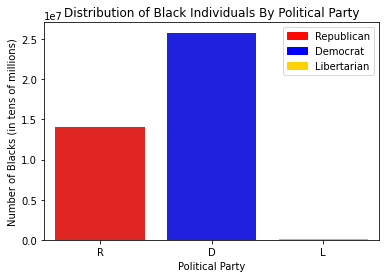

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "Black", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Distribution of Black Individuals By Political Party")
plt.ylabel("Number of Blacks (in tens of millions)")
plt.xlabel("Political Party")



# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()

**As we can see from this bar plot, the majority of individuals that chose Black as their race were in Democratic congressional districts. This is consistent with our initial hypothesis.**

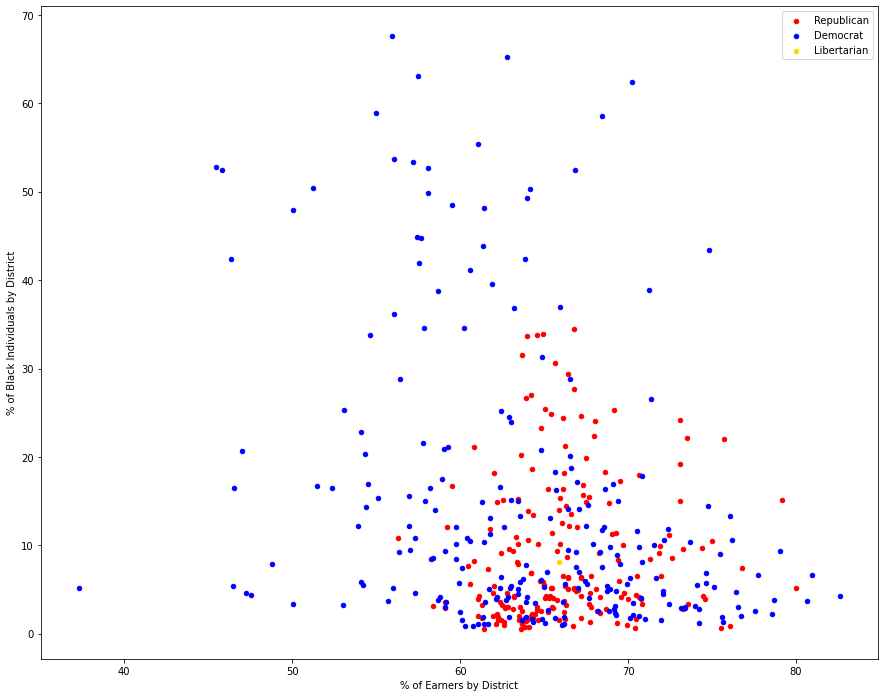

In [ ]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]
L = merged_df[merged_df['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of Earners by District', y='% of Black Individuals by District', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of Earners by District', y='% of Black Individuals by District',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of Earners by District', y='% of Black Individuals by District',c='gold',label='Libertarian', ax=ax)

plt.legend()
plt.show()

After analyzing the barplot, we created a scatter plot to visualize the % Black individuals by district on one axis and % of earners in a district on the other axis. We will color the plot based upon the party affiliation of the districts congress member as of the 116th congress. In the congressional districts with high percentages of black individuals (over ~35%), all the congressional districts are Democratic at all levels of earners.

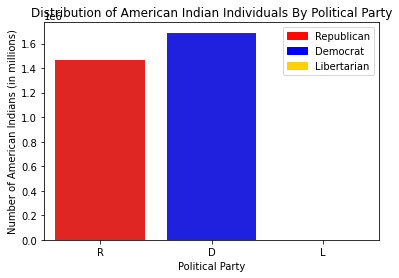

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "American Indian", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Distribution of American Indian Individuals By Political Party")
plt.ylabel("Number of American Indians (in millions)")
plt.xlabel("Political Party")

# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()

**As we can see from this bar plot, the majority of individuals that chose American Indians as their race were in Democratic congressional districts. This is consistent with our initial hypothesis.** 

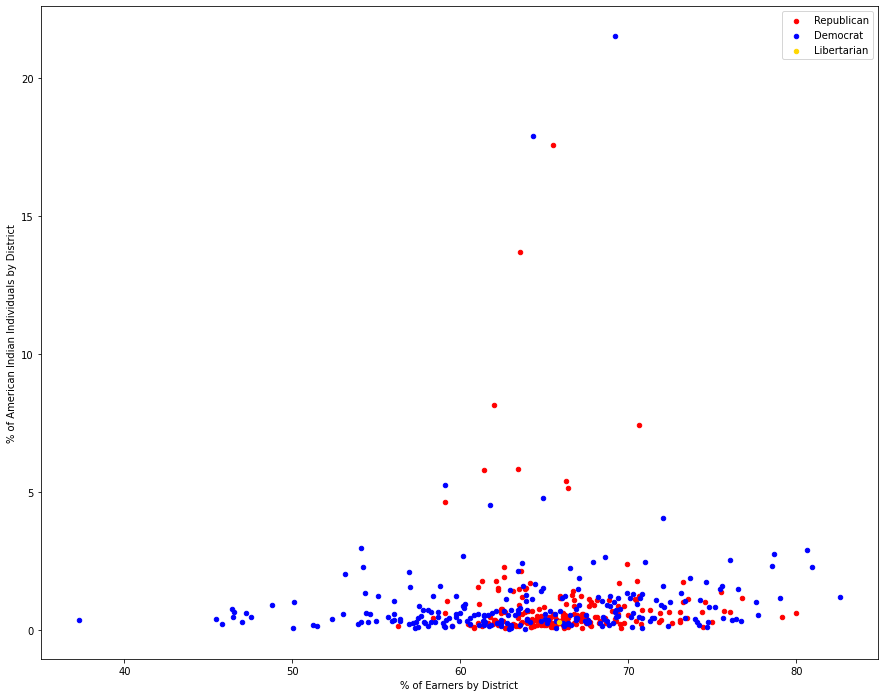

In [ ]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]
L = merged_df[merged_df['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of Earners by District', y='% of American Indian Individuals by District', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of Earners by District', y='% of American Indian Individuals by District',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of Earners by District', y='% of American Indian Individuals by District',c='gold',label='Libertarian', ax=ax)

plt.legend()
plt.show()

We also created a scatter plot to visualize the % American Indian individuals by district on one axis and % of earners in a district on the other axis. We will color the plot based upon the party affiliation of the districts congress member as of the 116th congress. The distribution of Republican and Democratic congressional districts is fairly mixed for those varying percentages of American Indian individuals. It is important to note that there are not many congressional districts with high percentages of American Indians (the highest is ~25%).

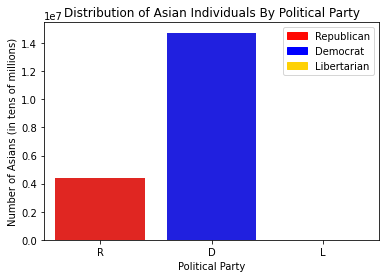

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=merged_df, x="Party", y = "Asian", estimator=sum, ci=None, palette=sns.color_palette(['#ff0803', '#0000ff', '#fed105']),ax=ax)
plt.title("Distribution of Asian Individuals By Political Party")
plt.ylabel("Number of Asians (in tens of millions)")
plt.xlabel("Political Party")

# Create a patches object for the legend
patches = [mpatches.Patch(color=sns.color_palette(['#ff0803', '#0000ff', '#fed105'])[i], label=label)
           for i, label in enumerate(["Republican", "Democrat", 'Libertarian'])]

# Add the patches object to the legend
plt.legend(handles=patches)
plt.show()

**As we can see from this bar plot, the majority of individuals that chose Asian as their race were in Democratic congressional districts. This is consistent with our initial hypothesis.**

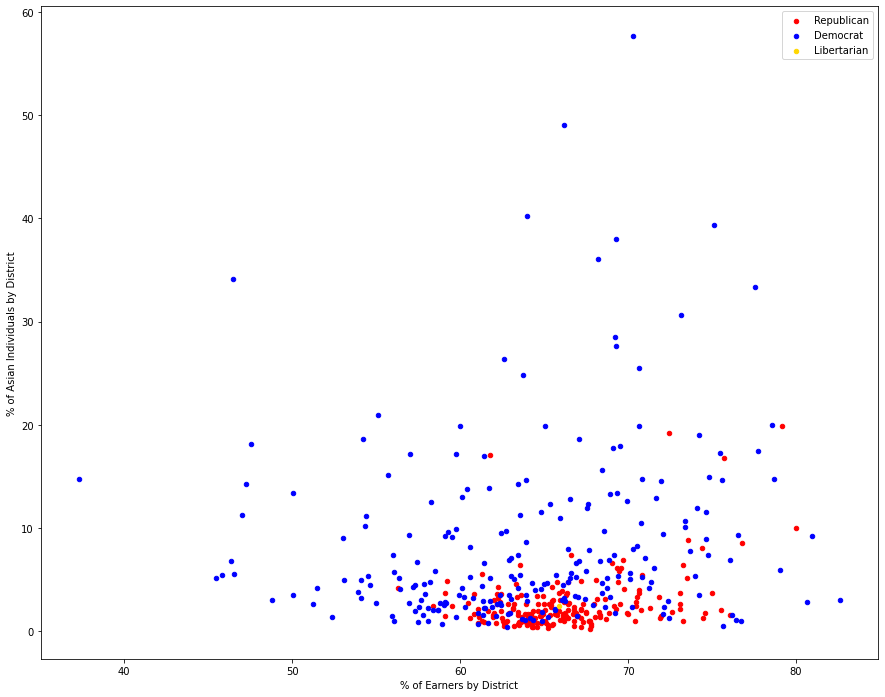

In [ ]:
R = merged_df[merged_df['Party'].str.contains('R')]
D = merged_df[merged_df['Party'].str.contains('D')]
L = merged_df[merged_df['Party'].str.contains('L')]

fig, ax = plt.subplots(figsize=(15, 12))
R.plot.scatter(x='% of Earners by District', y='% of Asian Individuals by District', c='red',label='Republican', ax=ax)
D.plot.scatter(x='% of Earners by District', y='% of Asian Individuals by District',c='blue',label='Democrat', ax=ax)
L.plot.scatter(x='% of Earners by District', y='% of Asian Individuals by District',c='gold',label='Libertarian', ax=ax)

plt.legend()
plt.show()

Next will have a scatter plot of congressional districts and look at the % Asian individuals by district on one axis and % of earners in a district on the other axis. We will color the plot based upon the party affiliation of the districts congress member as of the 116th congress. It appears that the congressional districts with higher percentages of Asians tend to be Democratics, regardless of the level of earners in the district.

In [ ]:
#pivoting subset data to aggregate by state
pivot_df = new_df_counts.pivot_table(index='State', columns='Party', values= ['White', 'Black', 'American Indian', 'Asian'], aggfunc='sum')
#pivot_df

In [ ]:
#pivoting subset data to show counts of individuals with respect to party categorized by race
pivot_df_party_race = new_df_counts.pivot_table(index='Party', values = ['White', 'Black', 'American Indian', 'Asian'],aggfunc='sum')


#proportion table of pivoted data
for party in ['D', 'L', 'R']:
    pivot_df_party_race.loc[party] = pivot_df_party_race.loc[party].div(pivot_df_party_race.loc[party].sum())

pivot_df_party_race = pivot_df_party_race.mul(100)
#print(pivot_df_party_race)

**Next we created a proportion table to look at the distribution of races with respect to each poltiical party. We can see that for all the political parties chosen, majority of respondents were White.**

In [ ]:
pivot_df_party_race.style.background_gradient(cmap='YlGn', low=0, high=1, axis=0, vmin=0, vmax=100)

,American Indian,Asian,Black,White
Party,,,,
D,1.285851,11.223465,19.657503,67.833180
L,0.331814,2.709444,9.018484,87.940259
R,1.103310,3.288405,10.553431,85.054854


**Statistical Analysis**

Next, we decided to looking into the statistical signficance of these findings. We created a logistic regression model to determine the influence of race on political party affiliation. For interpretation, the party encoded values are as follows: 0-Democratic, 1-Libertarian, 2-Republican. Based on the summary output of our model, we can conclude at the 95% confidence level there is a statistically signficant difference in the political affiliation in Republic congressional districts for White and Asian races.

In [ ]:
df1 = pd.concat([df[['White', 'Black', 'American Indian', 'Asian']],pd.get_dummies(df['Party'])],1)
df1.head()

,White,Black,American Indian,Asian,D,L,R
0,638395,30095,2437,11395,0,0,1
1,527281,165773,4140,10700,0,0,1
2,227884,358789,1817,29190,1,0,0
3,632466,9435,16181,3871,0,0,1
4,436783,256945,7992,7303,0,0,1


In [ ]:
from scipy.stats import spearmanr


#calculate Spearman Rank correlation and corresponding p-value for Whites with Democrats
rho, p = spearmanr(df1['White'], df1['D'])
WDrho = rho
WDp= p

# White with Republicans
rho, p = spearmanr(df1['White'], df1['R'])
WRrho = rho
WRp= p

# Black with Democrats
rho, p = spearmanr(df1['Black'], df1['D'])
BDrho = rho
BDp= p

# Black with Republicans
rho, p = spearmanr(df1['Black'], df1['R'])
BRrho = rho
BRp= p

# American Indian with Democrats
rho, p = spearmanr(df1['American Indian'], df1['D'])
ADrho = rho
ADp= p

# American Indian with Republicans
rho, p = spearmanr(df1['American Indian'], df1['R'])
ARrho = rho
ARp= p

# Asian with Democrats
rho, p = spearmanr(df1['Asian'], df1['D'])
ASDrho = rho
ASDp= p

# Asian with Republicans
rho, p = spearmanr(df1['Asian'], df1['R'])
ASRrho = rho
ASRp= p

In [ ]:
# P values of Race vs Party affiliation
data = {'Democrats' :[WDp, BDp, ADp, ASDp],
        'Republicans' : [WRp, BRp, ARp, ASRp]}

# Create the pandas DataFrame
df2 = pd.DataFrame(data, index={'White', 'Black', 'American Indian', 'Asian'})
df2.head()

,Democrats,Republicans
Black,1.062246e-38,4.303515e-38
White,2.253108e-03,2.170834e-03
American Indian,6.876692e-02,8.039663e-02
Asian,2.599022e-29,4.098911e-29


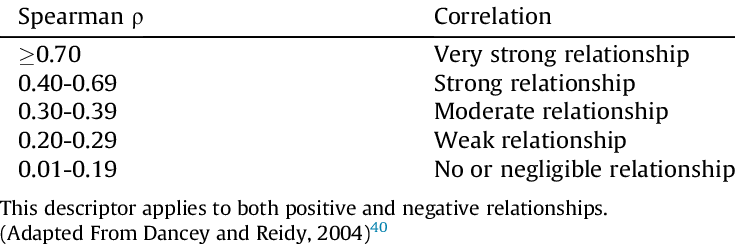

In [ ]:
# Rho values of Race vs Party affiliation
data = {'Democrats' :[WDrho, BDrho, ADrho, ASDrho],
        'Republicans' : [WRrho, BRrho, ARrho, ASRrho]}

# Create the pandas DataFrame
df2 = pd.DataFrame(data, index={'White', 'Black', 'American Indian', 'Asian'})
df2.head()

,Democrats,Republicans
Black,-0.569105,0.565260
White,0.146094,-0.146621
American Indian,0.087344,-0.083922
Asian,0.503290,-0.501735


**Conclusion**

Based on our analysis from the bar plots and proportion table above we can that this data supports our initial hypothesis that majority Black, American Indian and Asians are affiliated with a Democratic congressional district while majority of Whites are affiliated with a Republican congressional district. From our scatterplots we can see how the proportion of earners in a congressional could be a confounding variable to our findings. In the congressional districts with higher percentages of Black individual and Asian individuals, the congressional districts were all Democratic, regardless of the percentage of earners in the district. However, as the percentage of White individuals and and American Indian individuals increased in the congressional district, the influence of percentage of earners in the district did not have a clear influence.  Additionally, the proportion table we created gives insight into the magnitude of the distribution of these races by political party. Then we performed the Spearman's correlation test for our statistical analysis on this data. We found the p-values to be all statistically significant at 95% confidence level except for American Indians for both Democratic and Republican parties. We then found based on the correlation coefficients, Blacks and Asians have a slightly stronger relationship with being Democrats than Republicans. White have a stronger relationship with being Republicans. Based on our intial plots and statistical analysis, we can conclude that our original hypothesis for Whites, Asians and Blacks are supported while the political party of American Indians cannot be stastically determined.